### PARKİNSON HASTALIĞI VERİ SETİ

Bu veri seti, Parkinson hastalığını teşhis etmek ve ilerleyişini izlemek için çeşitli biyomedikal ses kayıtlarından elde edilen özellikleri içerir. Parkinson hastalığı, sinir sistemini etkileyen kronik ve ilerleyici bir hastalıktır ve genellikle motor kontrol bozuklukları ile karakterizedir. Veri setinde, Parkinson hastalarının ve sağlıklı bireylerin seslerinden elde edilen çok sayıda özellik bulunur. Veri seti, bu özelliklere dayanarak Parkinson hastalığının var olup olmadığını sınıflandırmak amacıyla kullanılabilir.

### Veri Setinde Bulunan Özellikler

Veri setinde aşağıdaki ana özellikler ve daha fazlası bulunmaktadır:

1. **id**: Her bir gözlemin benzersiz kimliği.
2. **gender**: Cinsiyet bilgisi (1: Erkek, 0: Kadın).
3. **PPE**: Tepe-taban genliği enerjisi.
4. **DFA**: Detrended Fluctuation Analysis (Trendden Arındırılmış Dalgalanma Analizi) skoru.
5. **RPDE**: Recurrence Period Density Entropy (Yinelenen Dönem Yoğunluk Entropisi) skoru.
6. **numPulses**: Algılanan nabız sayısı.
7. **numPeriodsPulses**: Nabız periyotlarının sayısı.
8. **meanPeriodPulses**: Ortalama nabız periyodu.
9. **stdDevPeriodPulses**: Nabız periyotlarının standart sapması.
10. **locPctJitter**: Lokal yüzdelik titreme.
11. **tqwt_kurtosisValue_dec_1 - tqwt_kurtosisValue_dec_36**: TQWT (Tunable Q-factor Wavelet Transform) kullanılarak elde edilen dekürsis (kurtosis) değerleri.

### Sınıflandırma

Veri setinde, Parkinson hastalığının varlığını veya yokluğunu belirten bir hedef değişken (class) bulunmaktadır:

- **class**: Sınıf etiketi (1: Parkinson hastası, 0: Sağlıklı birey).

Bu sınıf etiketi, veri setindeki özellikler kullanılarak Parkinson hastalığını teşhis etmek için bir makine öğrenmesi modeli eğitmek amacıyla kullanılır.

### Veri Setinin Analizi

Veri setinin analizi, özelliklerin dağılımını, aralarındaki ilişkileri ve hedef değişken ile olan bağlantılarını incelemek amacıyla yapılır. Bu analiz, aşağıdaki adımları içerir:

1. **Veri Yükleme ve Temel Bilgiler**: Veri seti yüklendikten sonra, temel bilgiler gözden geçirilir (satır sayısı, sütun sayısı, veri tipleri vb.).
2. **Eksik Değerlerin Kontrolü**: Veri setinde eksik değer olup olmadığı kontrol edilir.
3. **İstatistiksel Özet**: Veri setindeki özelliklerin istatistiksel özetleri çıkarılır (ortalama, standart sapma, min, max değerleri vb.).
4. **Korelasyon Analizi**: Özellikler arasındaki korelasyonlar incelenir ve bir korelasyon ısı haritası ile görselleştirilir.
5. **Özelliklerin Görselleştirilmesi**: Seçilen özellikler arasındaki ilişkiler ve hedef değişken ile olan bağlantılar pairplot gibi grafiklerle görselleştirilir.

In [27]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Scikit-learn kütüphanesinden çeşitli modellerin ve araçların import edilmesi
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
# Veri setini yükleme
dataset = pd.read_csv("C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv")

In [29]:
# Veri setinin ilk birkaç satırını gösterme
print("Veri setinin ilk birkaç satırı:")
dataset.head()

Veri setinin ilk birkaç satırı:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [30]:
# Veri seti hakkında temel bilgiler
print("\nVeri seti hakkında temel bilgiler:")
dataset.info()


Veri seti hakkında temel bilgiler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [31]:
# Veri setindeki eksik değerlerin kontrolü
print("\nVeri setindeki eksik değerler:")
dataset.isnull().sum()


Veri setindeki eksik değerler:


id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [32]:
# Veri setinin istatistiksel özeti
print("\nVeri setinin istatistiksel özeti:")
print(dataset.describe())


Veri setinin istatistiksel özeti:
               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324  

In [33]:
# veri kümesinin boyutlarını görüntüleme
print("\nVeri kümesinin boyutları:")
dataset.shape

# 756 örnek ve 755 değişken 


Veri kümesinin boyutları:


(756, 755)

In [34]:
# Her sınıftan kaç örnek olduğunu bulma
class_distribution = dataset['class'].value_counts()
print("Sınıf dağılımı:")
print(class_distribution)

Sınıf dağılımı:
class
1    564
0    192
Name: count, dtype: int64


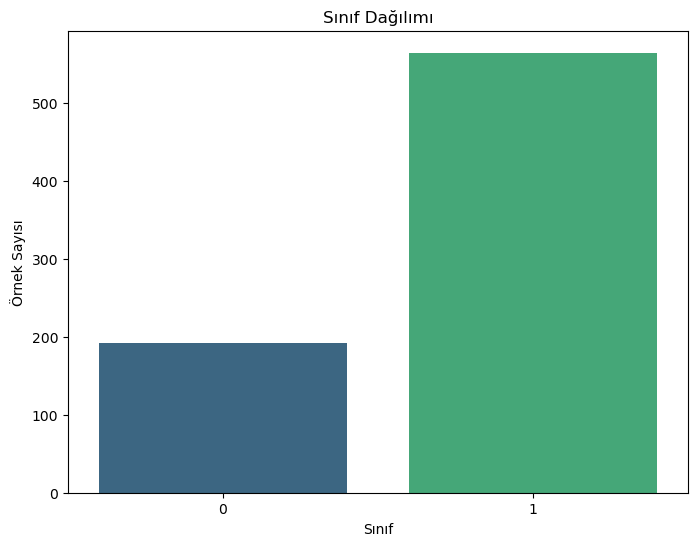

In [9]:
# Jupyter Notebook'ta grafikleri göstermek için
%matplotlib inline

# Sınıf dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=dataset, palette='viridis')
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Örnek Sayısı")
plt.show()

Sınıf dağılımında, 1 sınıfının 0 sınıfına göre daha fazla örneği olduğunu görüyoruz. Bu tür dengesiz sınıf dağılımları, makine öğrenimi modellerinin performansını olumsuz etkileyebilir çünkü model, baskın sınıfı tahmin etmeye daha eğilimli olabilir. Bu sorunu gidermek için birkaç yaklaşım bulunmaktadır. Yaklaşımlardan ikisi aşağıda belirtilmiştir. 

**1. Oversampling (Aşırı Örnekleme)**
Azınlık sınıfının örneklerini artırarak sınıf dengesini sağlamaya çalışabilirsiniz.

**2. Undersampling (Azaltma)**
Çoğunluk sınıfının örneklerini azaltarak sınıf dengesini sağlamaya çalışabilirsiniz.


In [35]:
dataset.max()  # Her sütun için maksimum değerleri döndürür.
dataset.min()  #Her sütun için minimum değerleri döndürür.

id                           0.000000
gender                       0.000000
PPE                          0.041551
DFA                          0.543500
RPDE                         0.154300
                               ...   
tqwt_kurtosisValue_dec_33    1.628700
tqwt_kurtosisValue_dec_34    1.861700
tqwt_kurtosisValue_dec_35    1.955900
tqwt_kurtosisValue_dec_36    2.364000
class                        0.000000
Length: 755, dtype: float64

**Veri analizi ve önişleme adımlarından sonra birkaç makine öğrenmesi algoritması ile veri setimizi modelleyeceğiz. Burada amacımız modellerin başarım oranlarını kıyaslamak ve hiperparametrelerin sonuçlar üzerindeki etkisi olacaktır.**

### Model 1 - KNN

DataFrame'leri veya Series'leri doğrudan kullandığımızda hata almaktayız. sklearn algoritmaları genellikle numpy array'lerini bekler. Bunun için verileri numpy array'lerine dönüştürmek gerekir. Bu yüzden kod bloğumuza StandardScaler() fonksiyonunu ekleyeceğiz.

Model Doğruluğu: 0.87


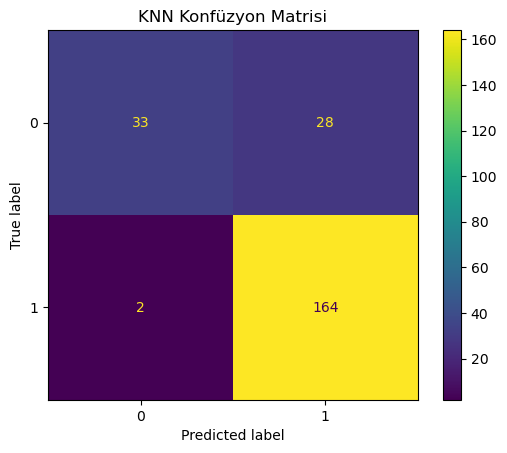

In [26]:
# Jupyter Notebook'ta grafikleri göstermek için
%matplotlib inline

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma
knn = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitme
knn.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = knn.predict(X_test)

# Konfüzyon matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Modelin doğruluğunu hesaplama
accuracy = knn.score(X_test, y_test)
print(f"Model Doğruluğu: {accuracy:.2f}")


# Konfüzyon matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("KNN Konfüzyon Matrisi")
plt.show()


**Hiperparametrlerin doğruluk oranını nasıl değiştirdiğini görmek için KNeighborsClassifier metodunun metric parametresini 3 şekilde deneme işlemini gerçekleştiriyoruz.**

minkowski Doğruluk: 0.87
euclidean Doğruluk: 0.87
manhattan Doğruluk: 0.85


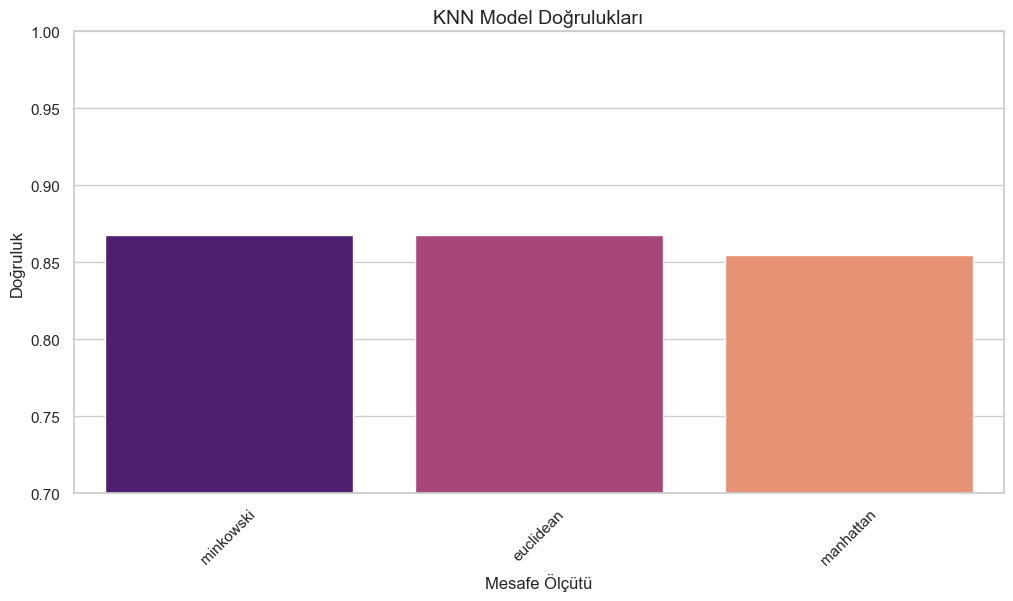

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Mesafe Ölçütleri ile KNN Modelini Oluşturma ve Değerlendirme
metrics = ['minkowski', 'euclidean', 'manhattan']
accuracies = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(metric, f"Doğruluk: {accuracy:.2f}")

# Grafik ayarları
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Renk paleti
colors = sns.color_palette("magma", len(metrics))

# Bar grafiği çizimi
sns.barplot(x=metrics, y=accuracies, palette=colors)
plt.xlabel('Mesafe Ölçütü', fontsize=12)
plt.ylabel('Doğruluk', fontsize=12)
plt.title('KNN Model Doğrulukları', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)  # Doğruluk değerlerine göre y eksenini ayarlayabilirsiniz
plt.show()


**Biz burada metod için sadece metric prametresini denedik. Bütün parametreler için en iyi oranı teker teker bulmak iyi bir yaklaşım olmayacaktır. Dolayısıyla bunun için bir metod geliştirilmiştir. GridSearchCV, aracı belirli bir modelin farklı hiperparametre kombinasyonlarını sistematik olarak deneyerek en iyi performansı sağlayan parametreleri bulur.**

In [13]:
# Model oluşturma
knn = KNeighborsClassifier()

# Parametre ızgarası
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Grid Search ile en iyi parametreleri bulma
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve sonuçları yazdırma
print("En iyi Parametreler:", grid_search.best_params_)
print("En İyi Doğruluk:", grid_search.best_score_)

# En iyi modeli kullanarak test seti üzerinde tahminler yapma
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Model doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Seti Doğruluğu: {accuracy:.2f}")


En iyi Parametreler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
En İyi Doğruluk: 0.8638095238095238
Test Seti Doğruluğu: 0.89


Model Doğruluğu: 0.89


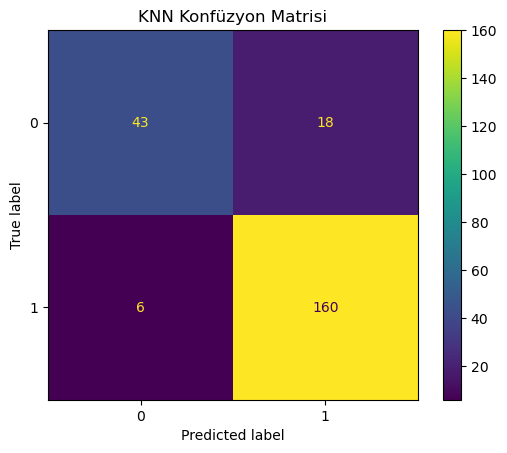

In [14]:
# Jupyter Notebook'ta grafikleri göstermek için
%matplotlib inline

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors=3, weights= 'uniform')

# Modeli eğitme
knn.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = knn.predict(X_test)

# Konfüzyon matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Modelin doğruluğunu hesaplama
accuracy = knn.score(X_test, y_test)
print(f"Model Doğruluğu: {accuracy:.2f}")


# Konfüzyon matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("KNN Konfüzyon Matrisi")
plt.show()


### Model 2 - SVM

**En iyi parametre değerlerini bulmak için kod :** 

In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning için parametreler
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Grid Search CV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# En iyi parametreleri bulma
print("En iyi parametreler:", grid.best_params_)

# En iyi model ile test seti üzerinde tahminler yapma
y_pred_grid = grid.best_estimator_.predict(X_test)

# Konfüzyon matrisini hesaplama
cm_grid = confusion_matrix(y_test, y_pred_grid)
print("Grid Search SVM Confusion Matrix:")
print(cm_grid)

# Doğruluk ve recall değerlerini hesaplama
accuracy_grid = accuracy_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
print('Grid Search SVM Accuracy:', accuracy_grid)
print('Grid Search SVM Recall:', recall_grid)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
En iyi parametreler: {'C': 1


SVM Doğruluk (Accuracy): 0.88
SVM Duyarlılık (Recall): 0.96
SVM Kesinlik (Precision): 0.88


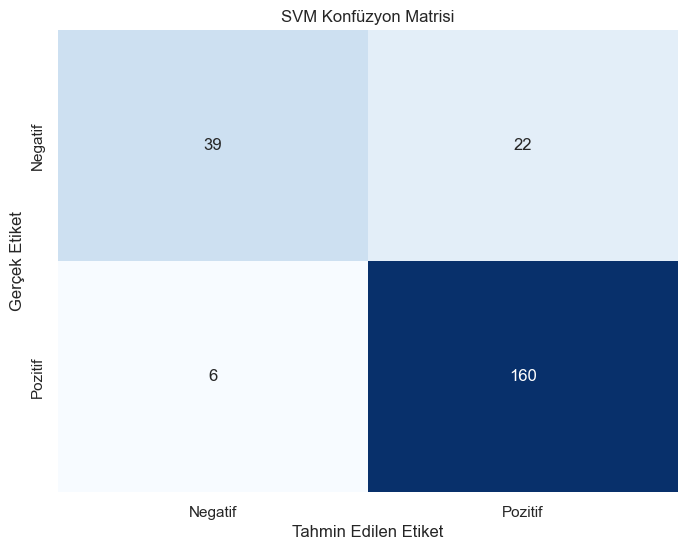

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma (shuffle=True ile karıştırarak)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# SVM modeli oluşturma ve eğitme
svm = SVC(C=100, kernel='rbf', degree=3, gamma=0.001)
svm.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_svm = svm.predict(X_test)

# Konfüzyon matrisini hesaplama
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Değerlendirme metriklerini hesaplama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)

print("\nSVM Doğruluk (Accuracy): {:.2f}".format(accuracy_svm))
print("SVM Duyarlılık (Recall): {:.2f}".format(recall_svm))
print("SVM Kesinlik (Precision): {:.2f}".format(precision_svm))

# Konfüzyon matrisini çizdirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('SVM Konfüzyon Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


### Model 3 - NAIVE BAES

**Multinomial Naive Bayes negatif verilerle çalışmadığından dolayı veri setinde düzeltmeler yapılmalıdır. Bu yüzden GaussianNB ile modelleme gerçekleştireceğiz.**


Gaussian Naive Bayes Doğruluk (Accuracy): 0.82
Gaussian Naive Bayes Duyarlılık (Recall): 0.90


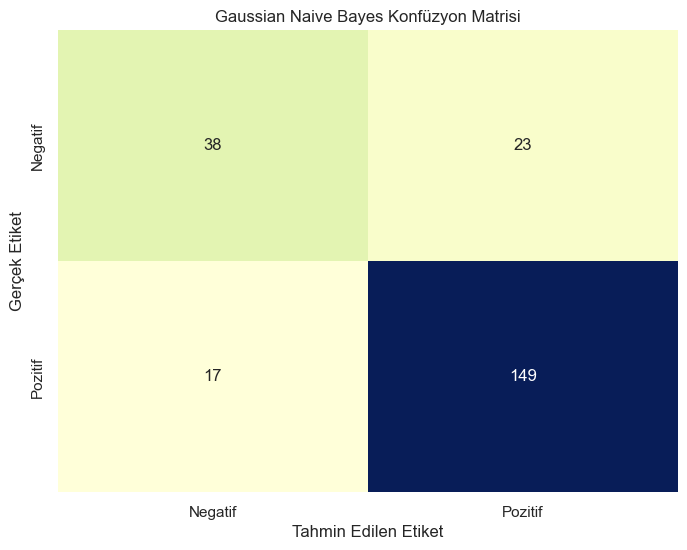

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Gaussian Naive Bayes modelinin oluşturulması ve eğitilmesi
gnb = GaussianNB(var_smoothing=0.8111308307896871)
gnb.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = gnb.predict(X_test)

# Konfüzyon matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Değerlendirme metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Sonuçları görsel olarak bastırma
print("\nGaussian Naive Bayes Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Gaussian Naive Bayes Duyarlılık (Recall): {:.2f}".format(recall))

# Konfüzyon matrisini çizdirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('Gaussian Naive Bayes Konfüzyon Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


### Model 4 - DECISION TREE


Decision Tree Doğruluk (Accuracy): 0.83
Decision Tree Duyarlılık (Recall): 0.92
Decision Tree Kesinlik (Precision): 0.86


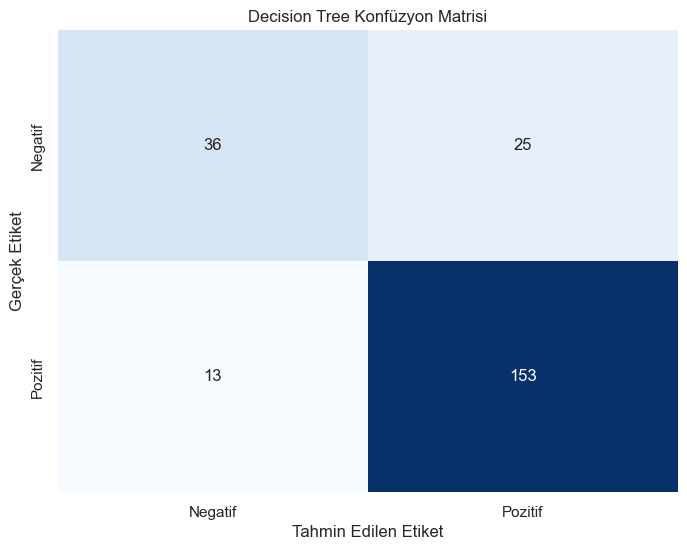

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setini yükleme
dataset_path = "C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv"
dataset = pd.read_csv(dataset_path)

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop('class', axis=1)
y = dataset['class']

# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Decision Tree modelinin oluşturulması ve eğitilmesi
dt = DecisionTreeClassifier(random_state=42,criterion= 'entropy',max_depth=5)
dt.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = dt.predict(X_test)

# Konfüzyon matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Değerlendirme metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Sonuçları görsel olarak bastırma
print("\nDecision Tree Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Decision Tree Duyarlılık (Recall): {:.2f}".format(recall))
print("Decision Tree Kesinlik (Precision): {:.2f}".format(precision))

# Konfüzyon matrisini çizdirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])
plt.title('Decision Tree Konfüzyon Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


### Model 5 - LOGISTIC REGRESYON


=== Lojistik Regresyon Model Performansı ===

Doğruluk Oranı (Accuracy): 0.84
Duyarlılık (Recall): 0.89
Kesinlik (Precision): 0.89


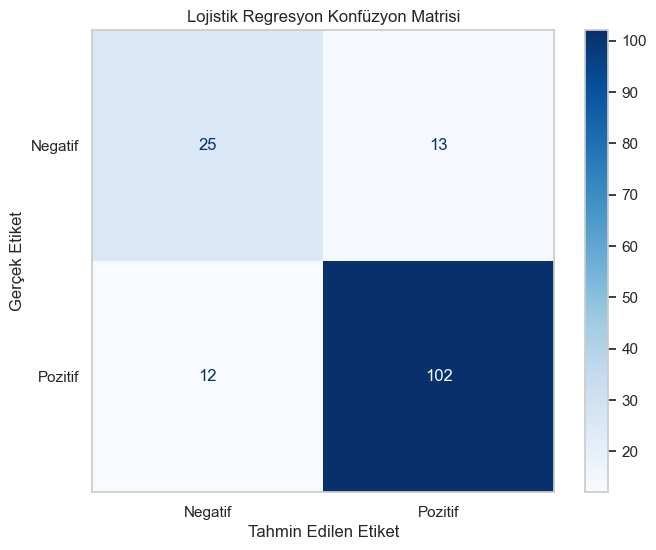

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, ConfusionMatrixDisplay

# Veri setini yükleme
dataset = pd.read_csv("C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv")

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop(columns=['class'])
y = dataset['class']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik Regresyon modelini oluşturma
model = LogisticRegression(max_iter=2000, solver='liblinear')  # solver ve max_iter ayarları

# Modeli eğitme
model.fit(X_train_scaled, y_train)

# Test seti üzerinde tahminler yapma
y_pred = model.predict(X_test_scaled)

# Modelin doğruluk, recall ve precision değerlerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Sonuçları yazdırma
print(f"\n=== Lojistik Regresyon Model Performansı ===\n")
print(f"Doğruluk Oranı (Accuracy): {accuracy:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")
print(f"Kesinlik (Precision): {precision:.2f}")

# Konfüzyon matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Konfüzyon matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Pozitif'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Lojistik Regresyon Konfüzyon Matrisi")
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.grid(False)  # Görselleştirmeyi daha temiz hale getirir
plt.show()


                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.898678   0.903955  0.963855  0.932945
1                  SVM  0.828194   0.867052  0.903614  0.884956
2          Naive Bayes  0.766520   0.864516  0.807229  0.834891
3        Decision Tree  0.775330   0.828571  0.873494  0.850440
4  Logistic Regression  0.819383   0.874251  0.879518  0.876877


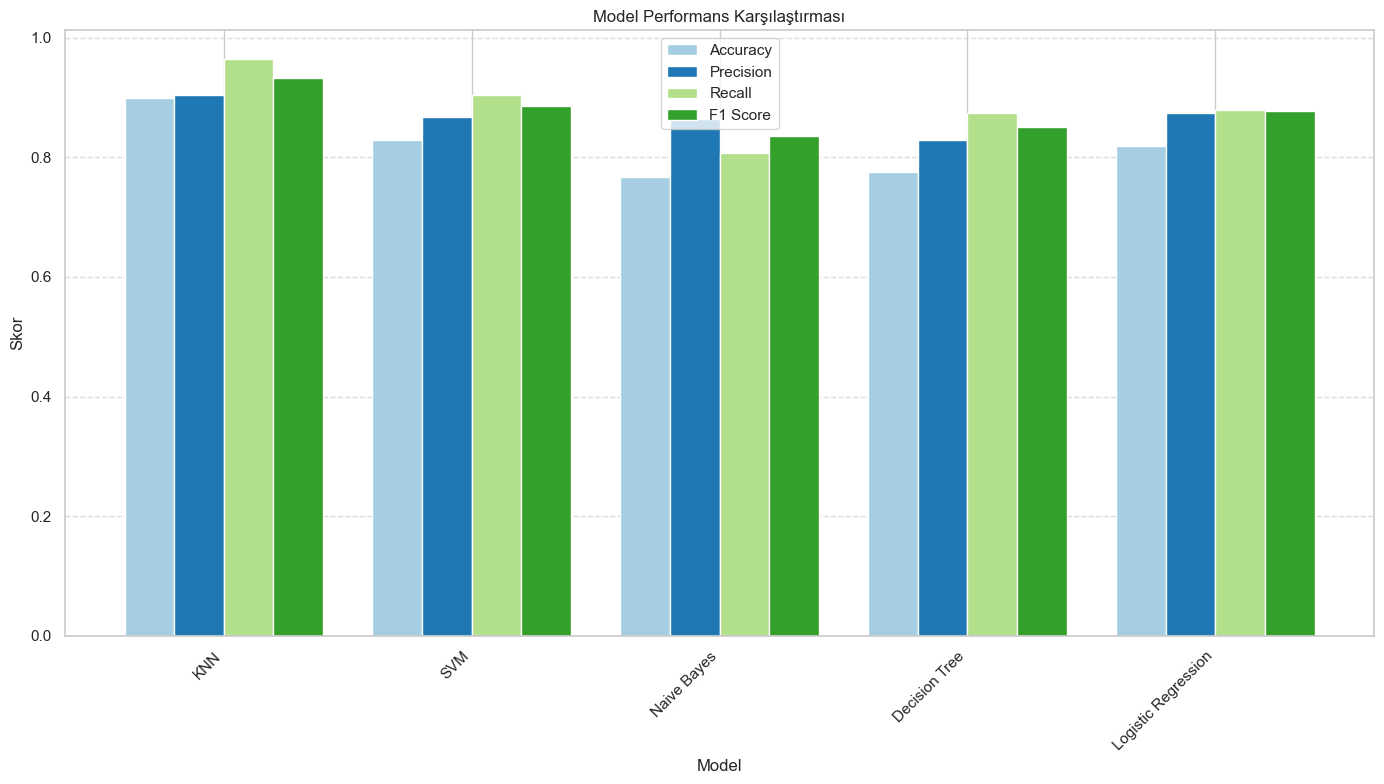

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Veri setini yükleme
dataset = pd.read_csv("C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv")

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop(columns=['class'])
y = dataset['class']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
models = {
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform'),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, criterion='gini'),
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='liblinear')
}

# Sonuçları depolamak için bir DataFrame oluşturma
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Her modeli eğitim ve test etme
results_list = []
for model_name, model in models.items():
    
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahminler yapma
    y_pred = model.predict(X_test_scaled)
    
    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Sonuçları listede depolama
    results_list.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Sonuçları DataFrame'e ekleme
results = pd.concat([results, pd.DataFrame(results_list)], ignore_index=True)

# Sonuçları yazdırma
print(results)

# Sonuçları görselleştirme
plt.figure(figsize=(14, 8))
colors = sns.color_palette("Paired", n_colors=4)

# Bar grafiğini çizme
bar_width = 0.2
index = range(len(results))
bar1 = plt.bar(index, results['Accuracy'], bar_width, label='Accuracy', color=colors[0])
bar2 = plt.bar([i + bar_width for i in index], results['Precision'], bar_width, label='Precision', color=colors[1])
bar3 = plt.bar([i + 2*bar_width for i in index], results['Recall'], bar_width, label='Recall', color=colors[2])
bar4 = plt.bar([i + 3*bar_width for i in index], results['F1 Score'], bar_width, label='F1 Score', color=colors[3])

plt.xlabel('Model')
plt.ylabel('Skor')
plt.title('Model Performans Karşılaştırması')
plt.xticks([i + 1.5*bar_width for i in index], results['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Lojistik Regresyon model performansını ayrıca görselleştirme
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

               Model  Accuracy  Precision    Recall  F1 Score
0                KNN  0.898678   0.903955  0.963855  0.932945
1                SVC  0.828194   0.867052  0.903614  0.884956
2      Decision Tree  0.775330   0.828571  0.873494  0.850440
3        Gaussian NB  0.766520   0.864516  0.807229  0.834891
4  Voting Classifier  0.885463   0.880435  0.975904  0.925714


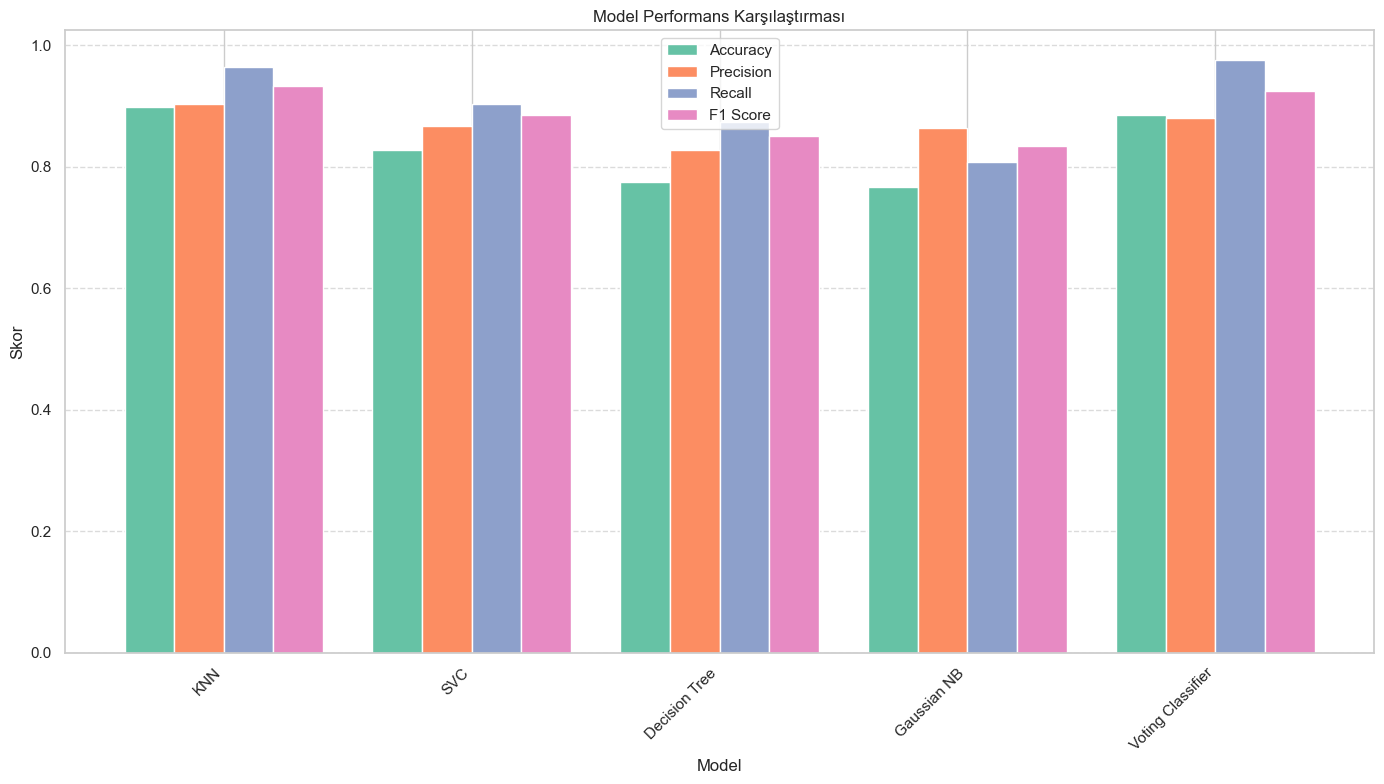

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Veri setini yükleme
dataset = pd.read_csv("C:\\Users\\sukri\\Makine Öğrenmesi Atölyesi\\Parkison_Dataset.csv")

# Özellikler ve hedef değişkeni ayırma
X = dataset.drop(columns=['class'])
y = dataset['class']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tanımlama
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')
svc = SVC(kernel='linear', probability=True)
dt = DecisionTreeClassifier(random_state=42, criterion='gini')
gnb = GaussianNB()

# Voting Classifier'ı tanımlama
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svc', svc), ('dt', dt), ('gnb', gnb)],
    voting='hard', weights=[1, 2, 1, 1]
)

# Sonuçları depolamak için bir DataFrame oluşturma
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Her modeli eğitim ve test etme
models = {
    "KNN": knn,
    "SVC": svc,
    "Decision Tree": dt,
    "Gaussian NB": gnb,
    "Voting Classifier": voting_clf
}

results_list = []
for model_name, model in models.items():
    
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahminler yapma
    y_pred = model.predict(X_test_scaled)
    
    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Sonuçları listede depolama
    results_list.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Sonuçları DataFrame'e ekleme
results = pd.concat([results, pd.DataFrame(results_list)], ignore_index=True)

# Sonuçları yazdırma
print(results)

# Sonuçları görselleştirme
plt.figure(figsize=(14, 8))
colors = sns.color_palette("Set2", n_colors=4)

# Bar grafiğini çizme
bar_width = 0.2
index = range(len(results))
bar1 = plt.bar(index, results['Accuracy'], bar_width, label='Accuracy', color=colors[0])
bar2 = plt.bar([i + bar_width for i in index], results['Precision'], bar_width, label='Precision', color=colors[1])
bar3 = plt.bar([i + 2*bar_width for i in index], results['Recall'], bar_width, label='Recall', color=colors[2])
bar4 = plt.bar([i + 3*bar_width for i in index], results['F1 Score'], bar_width, label='F1 Score', color=colors[3])

plt.xlabel('Model')
plt.ylabel('Skor')
plt.title('Model Performans Karşılaştırması')
plt.xticks([i + 1.5*bar_width for i in index], results['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# En iyi modelin konfüzyon matrisini görselleştirme
best_model_name = results.loc[results['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
